# QUORA QUESTION PAIRS


# DESCRIPTION:

Quora is a place to gain and share knowledge about anything.
Its a platform to ask question and connect with people who contribute unique insights and quality answers. Over 100 million 
people visit Quora every month, so it's no surprise that many people ask similarly questions. Multiple question wiht the same intent can cause seekers to spend more time finding the best answer to their question, and make writers feel they need to ansswer multiple versions of the same question.

# Problem Statement:


To identify which question asked on Quora are duplicates of questions that have already been asked.
This could be useful to instantly provide answers to questions that have already been answered.
Here task is to predict whether a pair of question are duplicates or not. 


# Real world/Business Objectives and Constraints 

1. The cost of a mis-classification can be very high.
2. We want the probability of a pair of questions to be duplicates so that you can choose any threshold of choice.
3. No strict latency concerns.

# Machine Learning Probelm

# Data 

Data Overview:
- Train.csv contains 5 columns : qid1, qid2, question1, question2, is_duplicate
- Size of Train.csv - 60MB
- Number of rows in Train.csv = 404,290

# Example Data point

"id","qid1","qid2","question1","question2","is_duplicate"

"7","15","16","How can I be a good geologist?","What should I do to be a great geologist?","1"
"11","23","24","How do I read and find my YouTube comments?","How can I see all my Youtube comments?","1

# Type of Machine Leaning Problem
It is a binary classification problem, for a given pair of questions we need to predict if they are duplicate or not.

# Performance Metric
1.log-loss
2.Binary Confusion Matrix

# Train and Test Construction
We build train and test by randomly splitting in the ratio of 70:30.

# Exploratory Data Analysis 

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [44]:
import os
import seaborn as sns

In [45]:
print(os.getcwd())
os.chdir("E:/AAIML/Module 6/Quora Question pair similarity/Data")

E:\AAIML\Module 6\Quora Question pair similarity\Data


In [46]:
df=pd.read_csv("train.csv")
print("No of data points: ", df.shape)

No of data points:  (404290, 6)


In [47]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
id              404290 non-null int64
qid1            404290 non-null int64
qid2            404290 non-null int64
question1       404289 non-null object
question2       404288 non-null object
is_duplicate    404290 non-null int64
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [49]:
df.describe()

,id,qid1,qid2,is_duplicate
count,404290.000000,404290.000000,404290.000000,404290.000000
mean,202144.500000,217243.942418,220955.655337,0.369198
std,116708.614502,157751.700002,159903.182629,0.482588
min,0.000000,1.000000,2.000000,0.000000
25%,101072.250000,74437.500000,74727.000000,0.000000
50%,202144.500000,192182.000000,197052.000000,0.000000
75%,303216.750000,346573.500000,354692.500000,1.000000
max,404289.000000,537932.000000,537933.000000,1.000000


In [50]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

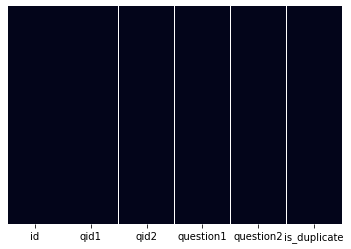

In [51]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [52]:
df.sample(2)

,id,qid1,qid2,question1,question2,is_duplicate
141068,141068,164956,224047,What are the best romantic tamil movies of 2016?,"Now that Donald Trump is President, does is me...",0
260305,260305,376237,376238,What is a cyber crime?,What is cyber crime?,1


In [53]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

In [54]:
df.columns.tolist()

['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate']

In [55]:
df.groupby("is_duplicate")["id"]

In [56]:
df.groupby("is_duplicate")["id"].count()

is_duplicate
0    255027
1    149263
Name: id, dtype: int64

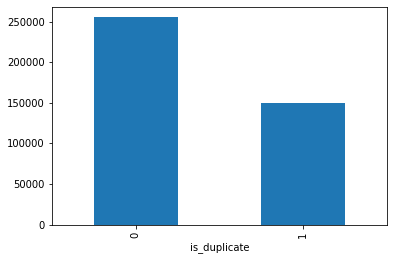

In [57]:
df.groupby("is_duplicate")["id"].count().plot.bar()

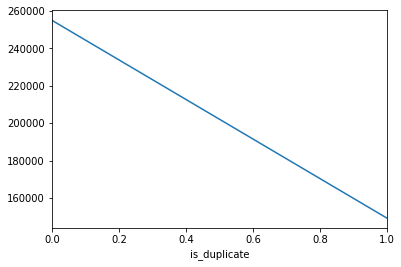

In [58]:
df.groupby("is_duplicate")["id"].count().plot()

In [59]:
print('~> Total number of question pairs for training:\n   {}'.format(len(df)))

~> Total number of question pairs for training:
   404290


In [60]:
print("Question pair which is not Similar: {}".format(100-round(df["is_duplicate"].mean()*100)))

Question pair which is not Similar: 63


In [61]:
print('\n~> Question pairs are Similar (is_duplicate = 1):\n   {}%'.format(round(df['is_duplicate'].mean()*100, 2)))


~> Question pairs are Similar (is_duplicate = 1):
   36.92%


In [62]:
df['is_duplicate'].mean()

0.369197853026293

In [63]:
x=len(df[df.is_duplicate==0])

In [64]:
y=len(df[df.is_duplicate==1])

In [65]:
mean_x=x/(x+y)

In [66]:
print("Disimilar: ", mean_x)

Disimilar:  0.630802146973707


In [67]:
print("Similar: ",1-mean_x)

Similar:  0.36919785302629304


In [68]:
qids=pd.Series(df['qid1'].tolist()+df['qid2'].tolist())
unique_qs=len(np.unique(qids))
qs_morethan_onetime=np.sum(qids.value_counts()>1)
print('Total number of unique quesiton are: {}\n'.format(unique_qs))

Total number of unique quesiton are: 537933



In [69]:
print("No. of unique questions that appear more than one time: {} ({})%\n".format(qs_morethan_onetime,qs_morethan_onetime/unique_qs*100))
print("max no of times a single ques is repeated".format(max(qids.value_counts())))


No. of unique questions that appear more than one time: 111780 (20.77953945937505)%

max no of times a single ques is repeated


In [70]:
q_vals=qids.value_counts()

In [71]:
print(q_vals)

2559      157
30782     120
4044      111
2561       88
14376      79
         ... 
75109       1
81254       1
85352       1
83305       1
168274      1
Length: 537933, dtype: int64


In [72]:
q_vals=q_vals.values

In [73]:
print(q_vals)

[157 120 111 ...   1   1   1]


In [74]:
print(qids.values)

[     1      3      5 ... 537929 537931 537933]


In [75]:
#Plotting the graph...

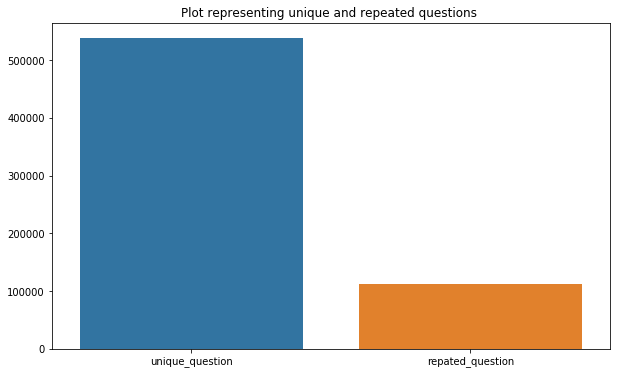

In [76]:
x=["unique_question","repated_question"]
y=[unique_qs,qs_morethan_onetime]
plt.figure(figsize=(10,6))
plt.title("Plot representing unique and repeated questions ")
sns.barplot(x,y)

Chekcing for duplicates

In [77]:
pair_duplicates=df[['qid1','qid2','is_duplicate']].groupby(['qid1','qid2']).count().reset_index()
print("Number fo duplicate questions ",(pair_duplicates).shape[0]-df.shape[0])

Number fo duplicate questions  0


In [78]:
df.shape[0]

404290

In [79]:
(pair_duplicates).shape[0]

404290

Number of occurrences of each question

Max no. of times a single question is repeated: 157



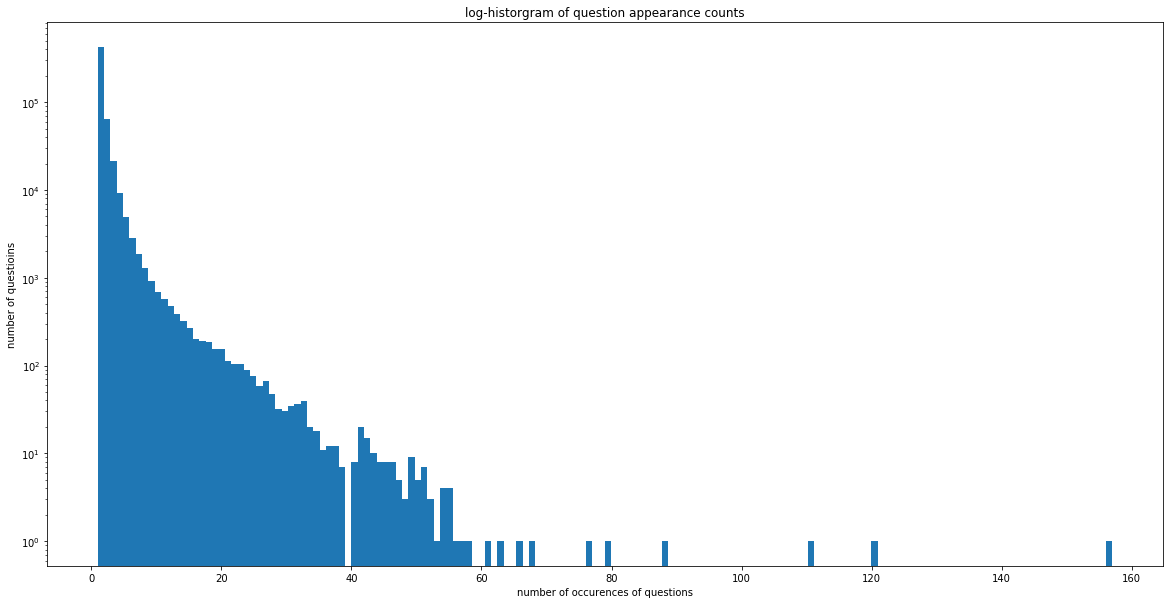

In [80]:
plt.figure(figsize=(20,10))
plt.hist(qids.value_counts(),bins=160)
plt.yscale('log')
plt.title('log-historgram of question appearance counts')
plt.xlabel('number of occurences of questions')
plt.ylabel('number of questioins')
print('Max no. of times a single question is repeated: {}\n'.format(max(qids.value_counts())))


checking for null values

In [81]:
#checking whether there are any rows with null values
nanrows=df[df.isnull().any(1)]
nanrows.head()

,id,qid1,qid2,question1,question2,is_duplicate
105780,105780,174363,174364,How can I develop android app?,NaN,0
201841,201841,303951,174364,How can I create an Android app?,NaN,0
363362,363362,493340,493341,NaN,My Chinese name is Haichao Yu. What English na...,0


In [82]:
df = df.fillna('')
nan_rows = df[df.isnull().any(1)]
print (nan_rows)

Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate]
Index: []


In [89]:
#df['freq_qid1']=df.groupby('qid1')['qid1'].transform('count')
#df['freq_qid2']=df.groupby('qid2')['qid2'].transform('count')
#df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1


In [90]:
#df['q1len']=df['question1'].str.len()
#df['q2len']=df['question2'].str.len()
#df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39


In [94]:
#df['q1_n_words']=df['question1'].apply(lambda r:len(r.split(" ")))
#df['q2_n_words']=df['question2'].apply(lambda r:len(r.split(" ")))
#df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7


In [103]:
#len(df['question1'][1].split(" "))

8

In [104]:
#l=[1,2,3,1,4,1,5]

In [105]:
#print(l)

[1, 2, 3, 1, 4, 1, 5]


In [106]:
#s=set(l)
#print(s)

{1, 2, 3, 4, 5}


In [114]:
#def normalized_word_common(row):
#    w1=set(map(lambda word: word.lower().strip(),row['question1'].split(" ")))
#    w2=set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
#    ##print(w1)
#    ##print(w2)
#    return 1.0*len(w1 & w2)
#df['word_common']=df.apply(normalized_word_common,axis=1)

In [115]:
#def normalized_word_total(row):
#    w1=set(map(lambda word:word.lower().strip(),row['question1'].split(" ")))
#    w2=set(map(lambda word:word.lower().strip(),row['question2'].split(" ")))
#    return 1.0*(len(w1)+len(w2))
#df['word_total']=df.apply(normalized_word_total,axis=1)

In [118]:
#def normalized_word_share(row):
#    w1=set(map(lambda word:word.lower().strip(),row['question1'].split(" ")))
#    w2=set(map(lambda word:word.lower().strip(), row['question2'].split(" ")))
#    return 1.0*len(w1 & w2)/(len(w1)+len(w2))
#df['word_share']=df.apply(normalized_word_share,axis=1)



In [119]:
#df['freq_q1+q2']=df['freq_qid1']+df['freq_qid2']
#df['freq_q1-q2']=abs(df['freq_qid1']-df['freq_qid2'])

#df.to_csv("df_fe_wo_preprocessing_train.csv",index=False)
#df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_common,word_total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0,20.0,0.200000,5,3
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4.0,24.0,0.166667,2,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0.0,19.0,0.000000,2,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,2.0,20.0,0.100000,4,2


In [120]:
if os.path.isfile('df_fe_without_preprocessing_train.csv'):
    df = pd.read_csv("df_fe_without_preprocessing_train.csv",encoding='latin-1')
else:
    df['freq_qid1'] = df.groupby('qid1')['qid1'].transform('count') 
    df['freq_qid2'] = df.groupby('qid2')['qid2'].transform('count')
    df['q1len'] = df['question1'].str.len() 
    df['q2len'] = df['question2'].str.len()
    df['q1_n_words'] = df['question1'].apply(lambda row: len(row.split(" ")))
    df['q2_n_words'] = df['question2'].apply(lambda row: len(row.split(" ")))

    def normalized_word_Common(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * len(w1 & w2)
    df['word_Common'] = df.apply(normalized_word_Common, axis=1)

    def normalized_word_Total(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * (len(w1) + len(w2))
    df['word_Total'] = df.apply(normalized_word_Total, axis=1)

    def normalized_word_share(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * len(w1 & w2)/(len(w1) + len(w2))
    df['word_share'] = df.apply(normalized_word_share, axis=1)

    df['freq_q1+q2'] = df['freq_qid1']+df['freq_qid2']
    df['freq_q1-q2'] = abs(df['freq_qid1']-df['freq_qid2'])

    df.to_csv("df_fe_without_preprocessing_train.csv", index=False)

df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0,20.0,0.200000,5,3
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4.0,24.0,0.166667,2,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0.0,19.0,0.000000,2,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,2.0,20.0,0.100000,4,2


In [121]:
print("Minimum length of the question in question1: ",min(df['q1_n_words']))
print("Minimum length of the question in question2:", min(df['q2_n_words']))

Minimum length of the question in question1:  1
Minimum length of the question in question2: 1


In [122]:
print("No. of question with minimum length in question 1 section: ",df[df['q1_n_words']==1].shape[0])
print("No. of question with minimum length in question 2 section: ",df[df['q2_n_words']==1].shape[0])

No. of question with minimum length in question 1 section:  67
No. of question with minimum length in question 2 section:  24


In [123]:
df.shape

(404290, 17)

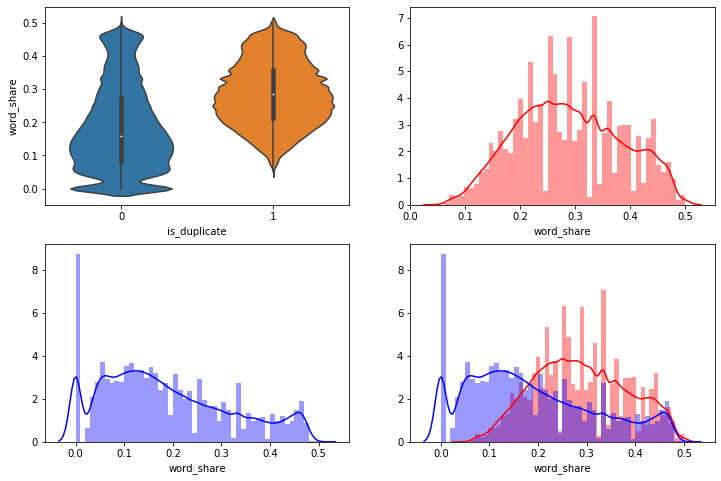

In [136]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.violinplot(x='is_duplicate',y='word_share',data=df[0:])
plt.subplot(2,2,2)
sns.distplot(df[df['is_duplicate']==1.0]['word_share'][0:],label="1",color='red')
plt.subplot(2,2,3)
sns.distplot(df[df['is_duplicate']==0.0]['word_share'][0:],label="0",color='blue')
plt.subplot(2,2,4)
sns.distplot(df[df['is_duplicate']==1.0]['word_share'][0:],label="1",color='red')
sns.distplot(df[df['is_duplicate']==0.0]['word_share'][0:],label="0",color='blue')


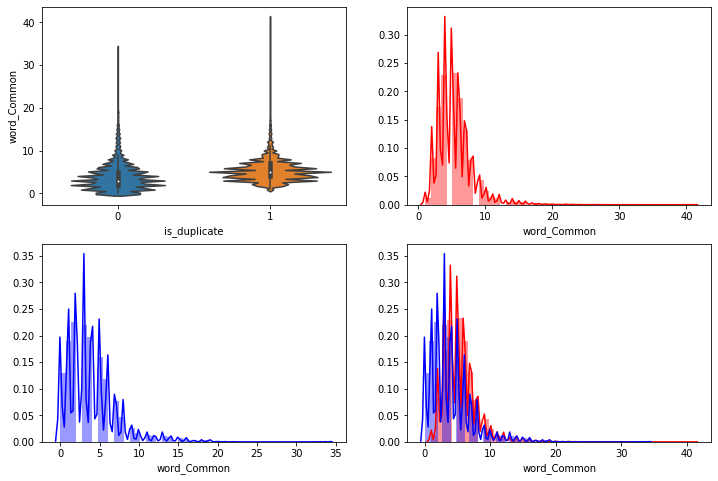

In [138]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.violinplot(x='is_duplicate',y='word_Common',data=df[0:])
plt.subplot(2,2,2)
sns.distplot(df[df['is_duplicate']==1.0]['word_Common'][0:],label="1",color='red')
plt.subplot(2,2,3)
sns.distplot(df[df['is_duplicate']==0.0]['word_Common'][0:],label="0",color='blue')
plt.subplot(2,2,4)
sns.distplot(df[df['is_duplicate']==1.0]['word_Common'][0:],label="1",color='red')
sns.distplot(df[df['is_duplicate']==0.0]['word_Common'][0:],label="0",color='blue')